# DRACO - Milestone 2: Dataset exploration

This document is structured as follow:

1. Characters Data - Extraction and Processing
2. Movie Data - Extraction and Processing
3. Actors Ethinicites - Exploration

---

In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
DATA_FOLDER = './Data/'

CHARACTER_PATH = DATA_FOLDER + 'MovieSummaries/character.metadata.tsv'
MOVIE_PATH = DATA_FOLDER + 'MovieSummaries/movie.metadata.tsv'
ETHNICITY_PATH = DATA_FOLDER + 'ethnicities_data.tsv'
NAME_PATH = DATA_FOLDER + 'MovieSummaries/name.clusters.txt'
PLOT_PATH = DATA_FOLDER + 'MovieSummaries/plot_summaries.txt'

## Characters Data - Extraction and Processing

First, we will load the character dataset and the ethnicity dataset. This is done to subsequently merge the two dataframes, connecting the characters with the ethnicity of the actors.

In [4]:
characters_original = pd.read_csv(CHARACTER_PATH, sep='\t', header=None, 
    names = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie release date", "Character name", "Birth", 
    "Gender", "Height", "Ethnicity ID", "Name", "Age at movie release",
    "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"])
characters = characters_original.copy()
characters.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Birth,Gender,Height,Ethnicity ID,Name,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [5]:
ethnicities_data_original = pd.read_csv(ETHNICITY_PATH, sep='\t',  
                               header=0, names=["Ethnicity ID", "Ethnicity"])
ethnicities_data = ethnicities_data_original.copy()
ethnicities_data.head()

,Ethnicity ID,Ethnicity
0,/m/044038p,NaN
1,/m/0x67,African Americans
2,/m/064b9n,Omaha people
3,/m/041rx,Jewish people
4,/m/033tf_,Irish Americans


After loading both datasets, we'll perform an inner join on the column `Ethnicity ID` to retain only the pertinent information.

In [6]:
missing_data = characters_original.count()
missing_data

Wikipedia Movie ID                 450669
Freebase Movie ID                  450669
Movie release date                 440674
Character name                     192794
Birth                              344524
Gender                             405060
Height                             154824
Ethnicity ID                       106058
Name                               449441
Age at movie release               292556
Freebase character/actor map ID    450669
Freebase character ID              192804
Freebase actor ID                  449854
dtype: int64

In [7]:
characters = characters_original.copy().merge(ethnicities_data.dropna(), how='inner', on='Ethnicity ID')
characters.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Birth,Gender,Height,Ethnicity ID,Name,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Ethnicity
0,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,African Americans
1,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,African Americans
2,3196793,/m/08yl5d,2000-02-16,NaN,1937-11-10,M,NaN,/m/0x67,Albert Hall,62.0,/m/0lr37dy,NaN,/m/01lntp,African Americans
3,156558,/m/014k4y,2001-06-27,Yvette,1970-09-11,F,1.650,/m/0x67,Taraji P. Henson,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,African Americans
4,156558,/m/014k4y,2001-06-27,Jody,1978-12-30,M,1.797,/m/0x67,Tyrese Gibson,22.0,/m/0jtx5h,/m/03jnxf4,/m/01l1b90,African Americans


## Movie Data - Extraction and Processing

Next, we load the movie dataset. This is essential as we plan to merge the character dataframe with the movie dataframe, creating a comprehensive dataframe that encompasses all character-related information.

In [8]:
movies_original = pd.read_csv(MOVIE_PATH, sep='\t', header=None, 
    names = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie name","Movie release date", "Box office revenue","Movie runtime","Movie language","Movie countries","Movie genres" ])
movies = movies_original.copy()
movies.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie name,Movie release date,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [9]:
missing_data = movies.isna().sum()
missing_data

Wikipedia Movie ID        0
Freebase Movie ID         0
Movie name                0
Movie release date     6902
Box office revenue    73340
Movie runtime         20450
Movie language            0
Movie countries           0
Movie genres              0
dtype: int64

We can observe that the three columns `Movie language`, `Movie language`, `Movie genres` contain dictionaries. In our case, it would be much more convenient to have lists instead. Let's process it accordingly

In [10]:
movies["Movie countries"] = movies["Movie countries"].apply(lambda x: list(json.loads(x).values()) if len(json.loads(x).values()) > 0 else 'NaN')
movies["Movie language"] = movies["Movie language"].apply(lambda x: list(json.loads(x).values()) if len(json.loads(x).values()) > 0 else 'NaN')
movies["Movie genres"] = movies["Movie genres"].apply(lambda x: list(json.loads(x).values()) if len(json.loads(x).values()) > 0 else 'NaN')

We should also add a category for the year of release in addition of the date of release

In [11]:
#Errors = 'coerce' will force the values that are outside the bound to be NaT
movies["Movie release year"] = pd.to_datetime(movies["Movie release date"],format='mixed',errors = 'coerce').dt.year
#Remove the NaN and NaT values
movies = movies[movies["Movie release year"].notna()]
#Express all years of realese as int.
movies["Movie release year"] = movies["Movie release year"].astype("int")


As the dataset was realesed on 2013, the data from this year are not complet and thus should be removed

In [12]:
movies = movies[movies['Movie release year'] != 2013]

We should now pay attention to remove the movie of the Animation field as the actors that have played inside are rather voice actors than actors. Generally in this domain, the looking and the ethinicty of the actors isn't as relevant as in the real action movies.

In [13]:
# First let's see all the unique genres, to discard the animation ones:
unique_genres = set()
movies['Movie genres'].apply(lambda x: unique_genres.update(x))
print(unique_genres)

{'Extreme Sports', 'Political drama', 'Cavalry Film', 'Haunted House Film', 'Historical drama', 'Sex comedy', 'Sexploitation', 'Erotic thriller', 'Monster movie', 'Historical fiction', 'Film noir', 'Spaghetti Western', 'Political Documetary', 'Hybrid Western', 'Black comedy', 'Baseball', 'Buddy Picture', 'News', 'Comedy Thriller', 'Teen', 'Goat gland', 'School story', 'Plague', 'Hardcore pornography', 'Education', 'Superhero', 'Fantasy Drama', 'Comedy horror', 'Coming of age', 'Softcore Porn', 'Marriage Drama', 'Space western', 'Fairy tale', 'Melodrama', 'Media Studies', 'Buddy cop', 'Revenge', 'Courtroom Comedy', 'Creature Film', 'Cult', "Children's/Family", 'Comedy film', 'Coming-of-age film', 'Sci Fi Pictures original films', 'B-movie', 'Road movie', 'Environmental Science', 'Malayalam Cinema', 'Chase Movie', 'Animal Picture', 'Action Comedy', 'Vampire movies', 'Sponsored film', 'Fantasy', 'Linguistics', 'Fantasy Comedy', 'Archives and records', 'N', 'Avant-garde', 'New Hollywood', 

In [14]:
values_to_find = ['Anime', 'Animation', 'Computer Animation', 'Clay animation', 'Animated cartoon','Stop motion']
movies = movies[movies['Movie genres'].apply(lambda x: not(any(value in x for value in values_to_find)))]


Now, let's merge the movie dataframe with the character dataframe to create a single dataframe that encompasses all the information about a character along with details about the films they are involved in.

In [15]:
characters_movies = characters.merge(movies, how='inner', on=['Wikipedia Movie ID',"Freebase Movie ID","Movie release date"])
characters_movies.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Birth,Gender,Height,Ethnicity ID,Name,Age at movie release,...,Freebase character ID,Freebase actor ID,Ethnicity,Movie name,Box office revenue,Movie runtime,Movie language,Movie countries,Movie genres,Movie release year
0,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,...,/m/0bgchn_,/m/01vw26l,African Americans,Ghosts of Mars,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001
1,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,...,/m/0bgchnd,/m/0418ft,African Americans,Ghosts of Mars,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001
2,975900,/m/03vyhn,2001-08-24,Tres,1959-03-09,M,NaN,/m/064b9n,Rodney A. Grant,42.0,...,/m/0bgchrw,/m/03ydsb,Omaha people,Ghosts of Mars,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001
3,3196793,/m/08yl5d,2000-02-16,NaN,1937-11-10,M,NaN,/m/0x67,Albert Hall,62.0,...,NaN,/m/01lntp,African Americans,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000
4,156558,/m/014k4y,2001-06-27,Yvette,1970-09-11,F,1.650,/m/0x67,Taraji P. Henson,30.0,...,/m/03jnxj_,/m/0blbxk,African Americans,Baby Boy,29381649.0,123.0,[English Language],[United States of America],"[Crime Fiction, Drama, Coming of age]",2001


## Actors Ethinicites - Exploration

### Ethinicity distribution

Let's visualized the proportion of ethinicties among the characters.
For now we're mostly going to compute the actors distribution thus we should remove also duplicates of actors.

In [16]:
unique_characters_movies = characters_movies.copy().drop_duplicates(subset='Freebase actor ID')

<Axes: xlabel='Ethnicity'>

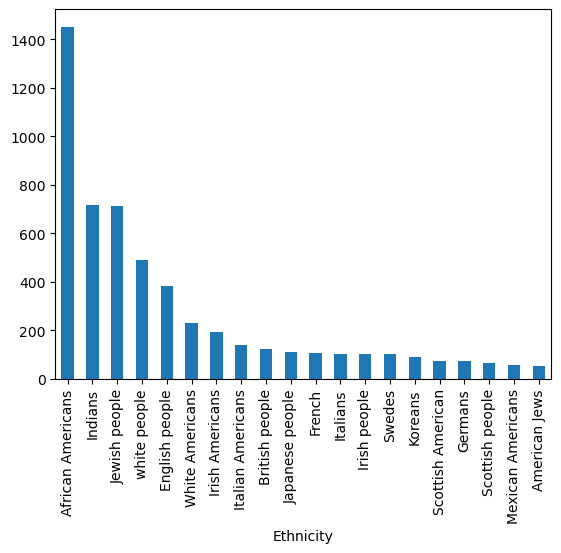

In [17]:
grouped_ethnicity=unique_characters_movies.groupby('Ethnicity').count()
grouped_ethnicity['Freebase actor ID'].sort_values(ascending=False)[0:20].plot(kind='bar')

Text(0, 0.5, 'Number of actors')

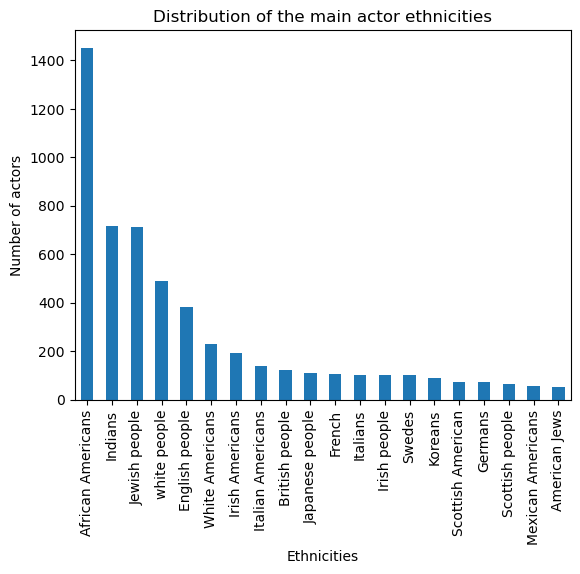

In [18]:
grouped_ethinity = unique_characters_movies.groupby(['Ethnicity']).count()
#grouped_ethinity = grouped_ethinity.div(grouped_ethinity.sum(axis=1), axis=0)
main_ethnicities = grouped_ethinity['Freebase actor ID'].sort_values(ascending=False)[0:20]
main_ethnicities.plot(kind='bar')
plt.title("Distribution of the main actor ethnicities")
plt.xlabel("Ethnicities")
plt.ylabel("Number of actors")

We've noticed that many characters are portrayed by Indian actors. For our project, our primary focus is on Hollywood characters. Let's see if this choice is representavie of the movie industry.

In [19]:
characters_movies_main_country = unique_characters_movies[unique_characters_movies["Movie countries"] != "NaN"].copy()
characters_movies_main_country["Movie countries"] = characters_movies_main_country["Movie countries"].apply(lambda x: x[0])

In [20]:
nb_actors_per_industries = characters_movies_main_country.groupby(['Movie countries']).count()['Freebase actor ID'].sort_values(ascending=False)
nb_actors_per_industries.head(10)

Movie countries
United States of America    5163
India                        956
United Kingdom               300
France                       280
Japan                         88
South Korea                   73
Sweden                        65
Canada                        58
Italy                         57
Philippines                   54
Name: Freebase actor ID, dtype: int64

To have a better view of the main industries let's consider only the industires with more than 100 different actors.

In [21]:
nb_actors_per_industries['Other'] = nb_actors_per_industries[nb_actors_per_industries < 100].sum()
nb_actors_per_industries = nb_actors_per_industries[nb_actors_per_industries > 100].sort_values(ascending=False)

<Axes: title={'center': 'Proportion of actors per industries'}>

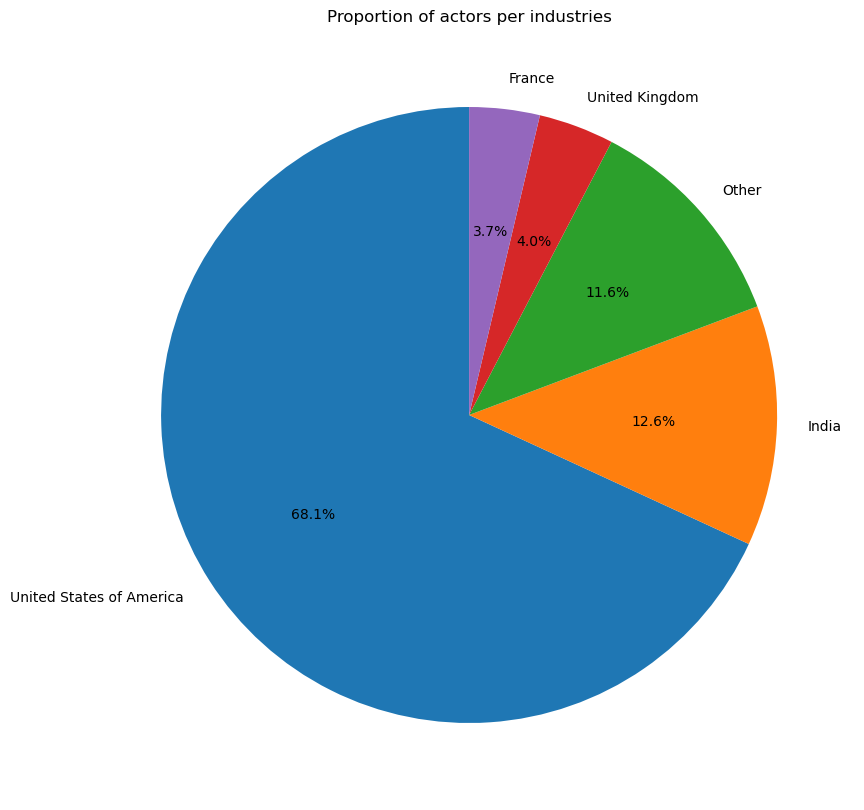

In [22]:
nb_actors_per_industries.plot.pie(figsize=(10, 10), autopct='%1.1f%%', startangle=90, title='Proportion of actors per industries', label='')


### Hollywoodian analysis



Let's narrow down our selection to include only Hollywood or American characters, meaning those characters that appear in American movies

In [23]:
characters_holywood = unique_characters_movies.copy()[unique_characters_movies["Movie countries"].apply(lambda x: 'United States of America' in x)]

By grouping the data by ethnicities, let's analyse what are the main ethnicties of Hollywoodian actors

In [24]:
H_grouped_ethnicity = characters_holywood.groupby(['Ethnicity']).count()
#Let's take the 10 main actor ethinicities
main_ethinicities = H_grouped_ethnicity['Freebase actor ID'].sort_values(ascending=False)[0:10].index
main_characters_holywood = characters_holywood[characters_holywood['Ethnicity'].isin(main_ethinicities)]
main_ethinicities

Index(['African Americans', 'Jewish people', 'white people', 'English people',
       'White Americans', 'Irish Americans', 'Italian Americans',
       'British people', 'Irish people', 'Scottish American'],
      dtype='object', name='Ethnicity')

Now let's visualize the distribution of holywoodian actors

Text(0, 0.5, 'Number of actors')

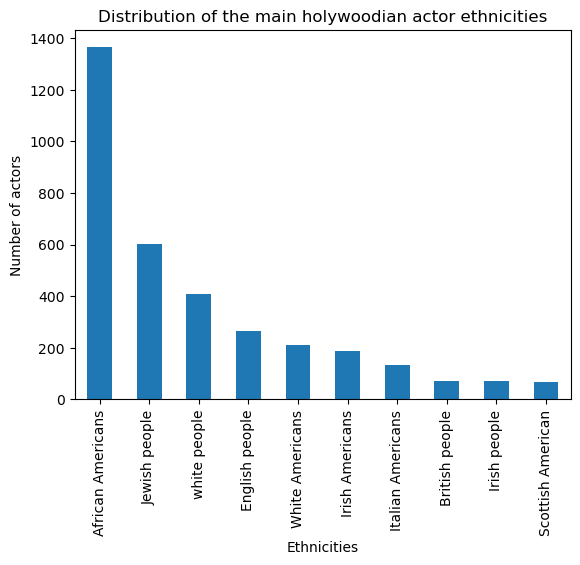

In [25]:
main_holywoodian_ethnicities =  H_grouped_ethnicity.loc[main_ethinicities]['Freebase actor ID']
main_holywoodian_ethnicities.plot(kind='bar')
plt.title("Distribution of the main holywoodian actor ethnicities")
plt.xlabel("Ethnicities")
plt.ylabel("Number of actors")

Analysze the sex distribution by ethnicities 

Text(0, 0.5, 'Proportion of actors')

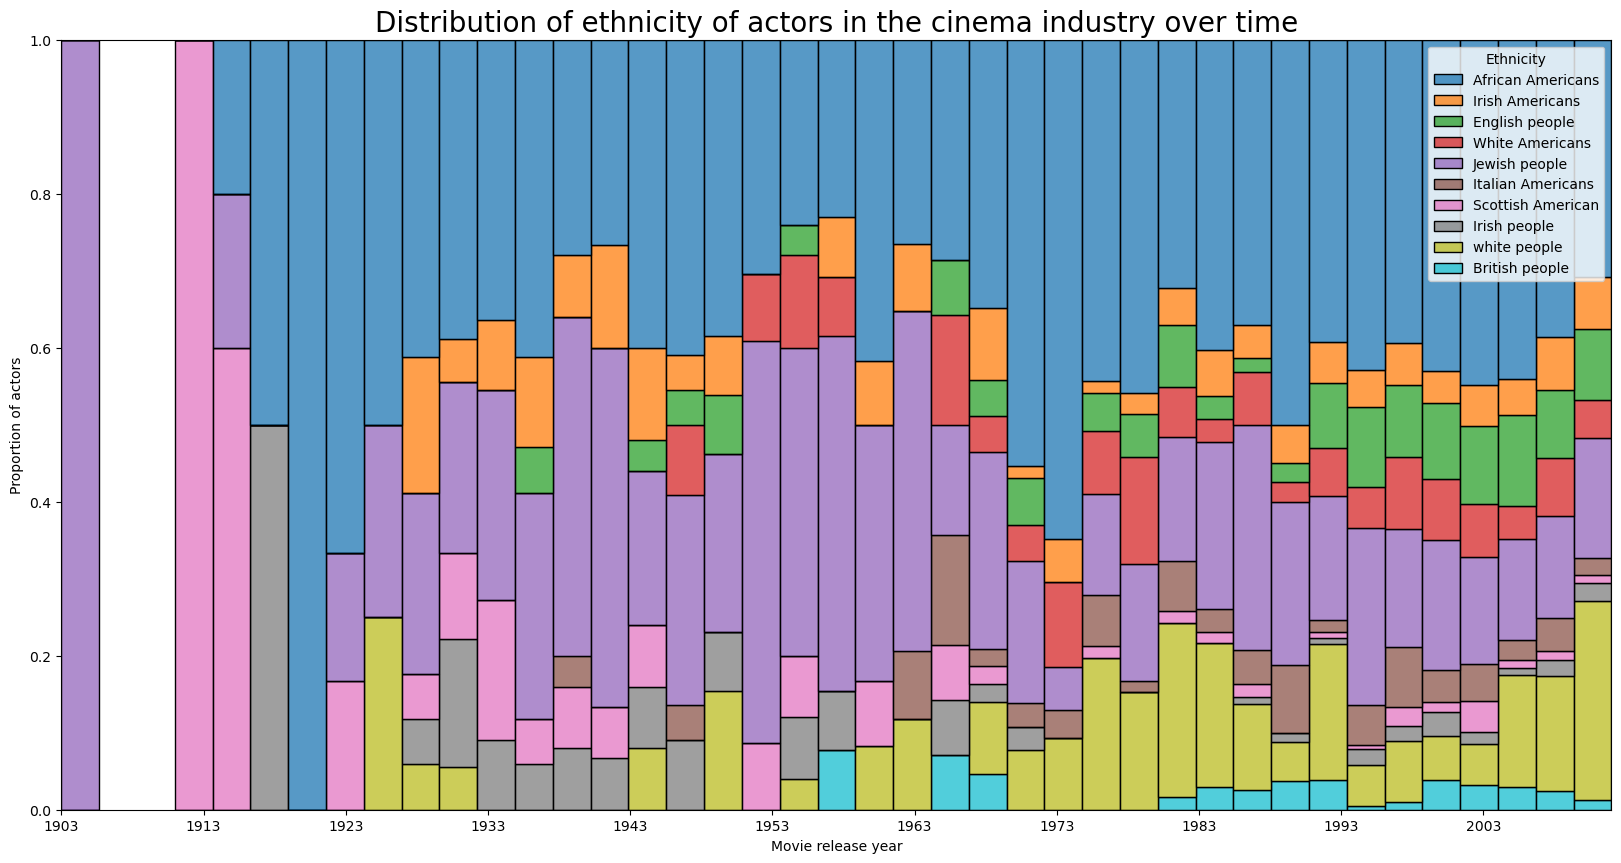

In [26]:
plt.figure(figsize=(20,10))
sns.histplot(data=main_characters_holywood,x='Movie release year',hue='Ethnicity',multiple='fill',stat='probability')
plt.title("Distribution of ethnicity of actors in the cinema industry over time",fontsize=20)
plt.xticks(np.arange(main_characters_holywood['Movie release year'].min(),main_characters_holywood['Movie release year'].max(),10))
plt.ylabel('Proportion of actors')


Text(0, 0.5, 'Proportion of actors')

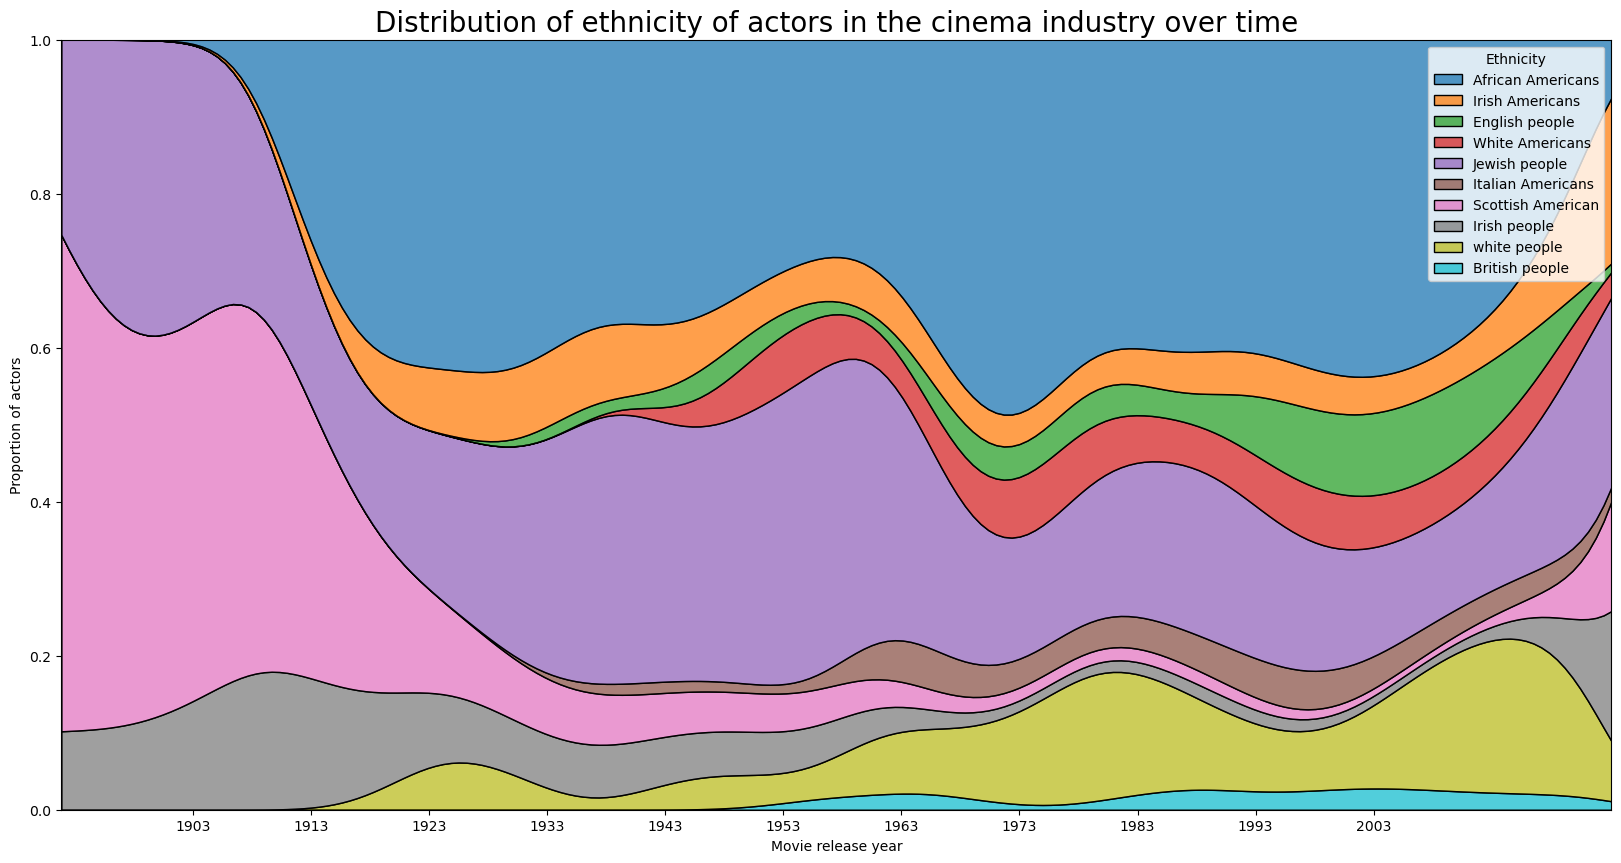

In [27]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=main_characters_holywood,x='Movie release year',hue='Ethnicity',multiple='fill')
plt.title("Distribution of ethnicity of actors in the cinema industry over time",fontsize=20)
plt.xticks(np.arange(main_characters_holywood['Movie release year'].min(),main_characters_holywood['Movie release year'].max(),10))
plt.ylabel('Proportion of actors')


(2020.0, 1900.0)

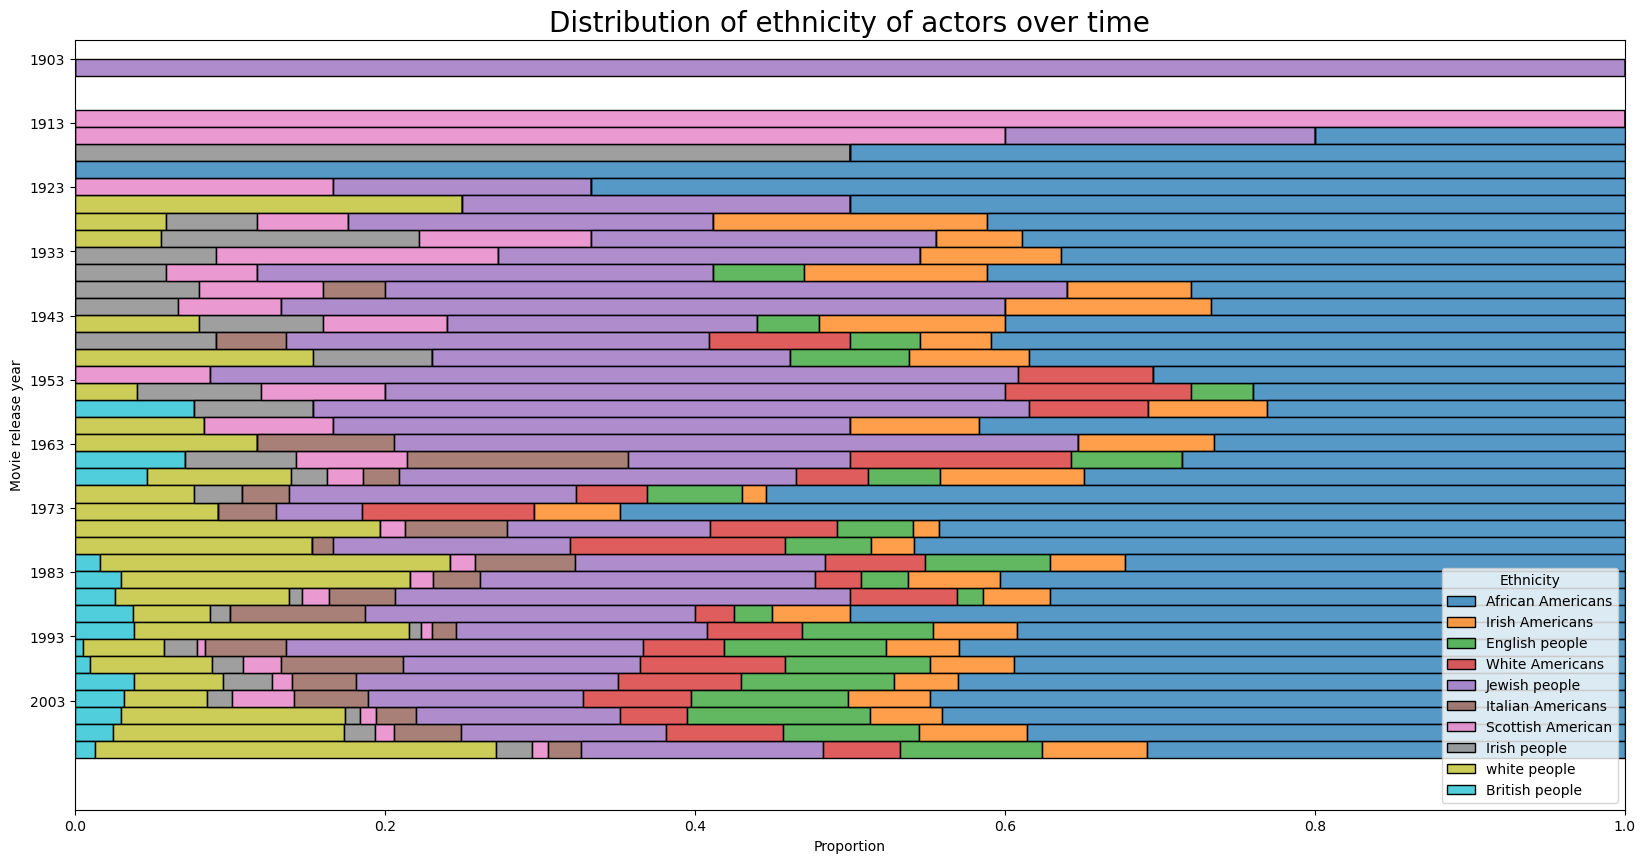

In [28]:
# Same plot but with diffrent orientationm for bettwer visibility
plt.figure(figsize=(20,10))
sns.histplot(data=main_characters_holywood, y='Movie release year', hue='Ethnicity', multiple='fill', stat='probability')
plt.title("Distribution of ethnicity of actors over time",fontsize=20)
plt.yticks(np.arange(main_characters_holywood['Movie release year'].min(), main_characters_holywood['Movie release year'].max(), 10))
plt.xlabel('Proportion')
plt.ylim(2020, 1900)

<Axes: title={'center': 'Evolution of actor diversity over time'}, xlabel='Movie release year', ylabel='Ethnicity'>

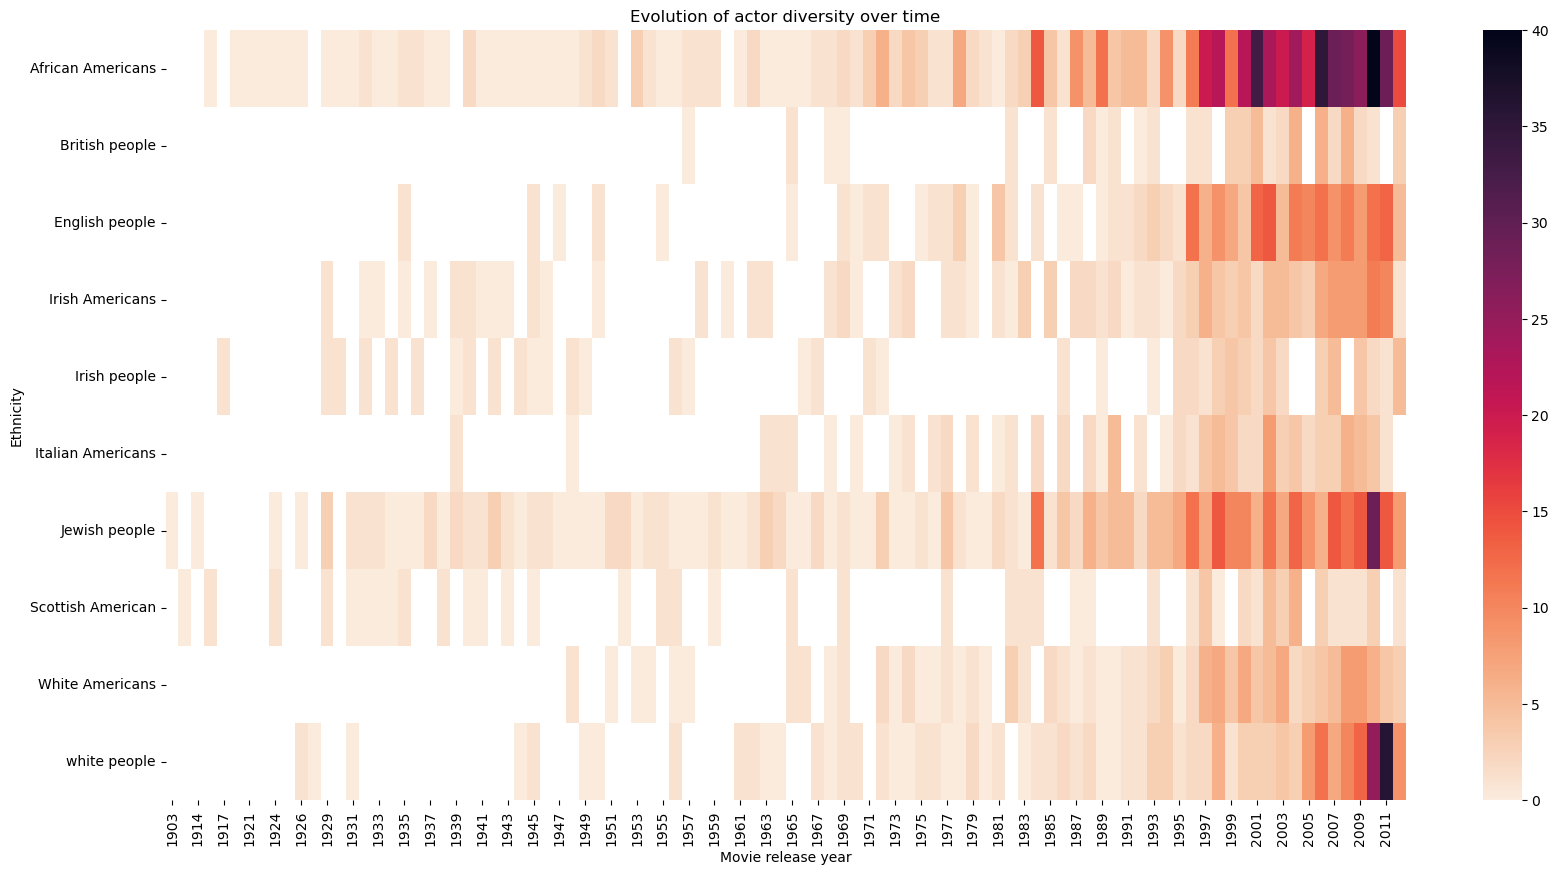

In [29]:
map_year_actor = main_characters_holywood.pivot_table(index=['Movie release year'], columns='Ethnicity', values='Freebase character ID', aggfunc='count')
df_year_actor = pd.DataFrame(map_year_actor.values,columns=map_year_actor.columns.values.tolist(),index=map_year_actor.index.values.tolist())
plt.figure(figsize=(20,10))
plt.title("Evolution of actor diversity over time")
sns.heatmap(map_year_actor.transpose(),cmap="rocket_r")

Text(0, 0.5, 'Number of actors')

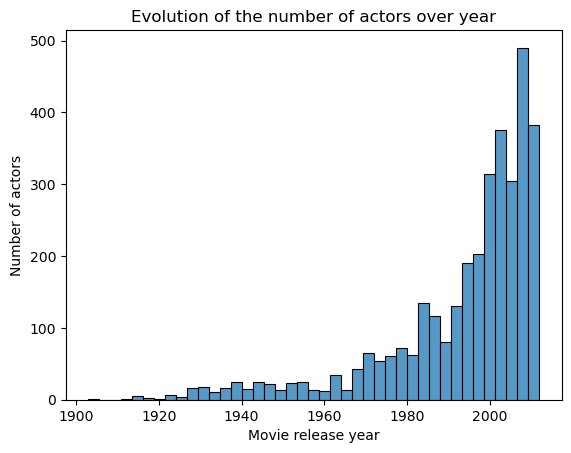

In [30]:
sns.histplot(data= main_characters_holywood ,x='Movie release year',stat='count')
plt.title('Evolution of the number of actors over year')
plt.ylabel('Number of actors')

Let's determine how does the diversity (number of different ethnicities) on a movies have evolved over time

**We could try to define a dervisty score depending on different factors**

In [31]:
#Count the number of unique ethnicities in a movie cast 
diversity_per_movie = main_characters_holywood.groupby('Freebase Movie ID')['Ethnicity'].apply(lambda x : (len(np.unique(x))/len(x))*100)
#Then for each year, find the mean number of unique ethnicities in the cast
diversity_per_movie = pd.DataFrame({'Freebase Movie ID': diversity_per_movie.index.values,'Unique ethnicity':diversity_per_movie.values })

main_characters_holywood = main_characters_holywood.merge(diversity_per_movie,how='left',on='Freebase Movie ID')

Text(0, 0.5, 'Mean proportion of diversity in a movie cast')

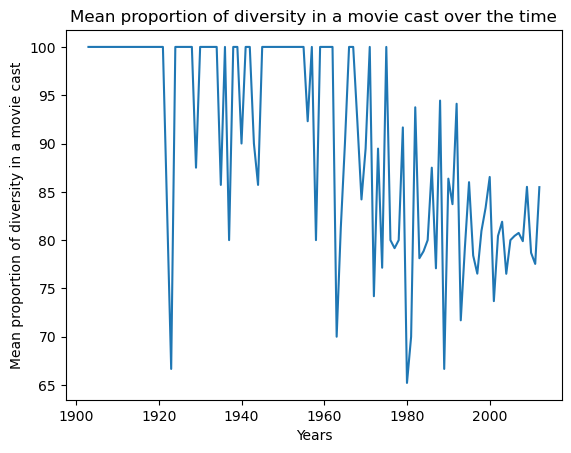

In [32]:
main_characters_holywood.groupby('Movie release year')['Unique ethnicity'].mean().plot()
plt.title('Mean proportion of diversity in a movie cast over the time')
plt.xlabel('Years')
plt.ylabel('Mean proportion of diversity in a movie cast')

## Gender analysis

Now, create a pyramid plot to show the difference between ethnicities over the years.

In [33]:
H_ethinity_M = main_characters_holywood[main_characters_holywood['Gender'] == 'M'].groupby(['Ethnicity'])['Freebase actor ID'].count().sort_values()
H_ethinity_M_reversed = H_ethinity_M*(-1)
H_ethinity_F = main_characters_holywood[main_characters_holywood['Gender'] == 'F'].groupby(['Ethnicity'])['Freebase actor ID'].count().sort_values()

Text(0.5, 1.0, 'Sex distribtion depending on the ethincity over all time')

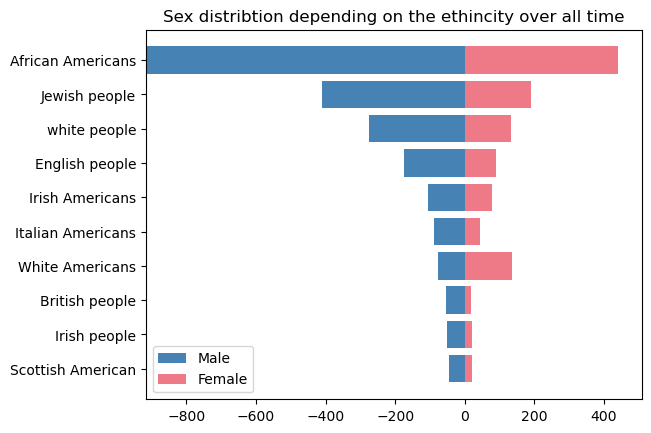

In [34]:
plt.barh(y=H_ethinity_M.index, width=H_ethinity_M.values, left=H_ethinity_M_reversed.values, color="#4682b4", label="Male")
plt.barh(y=H_ethinity_F.index, width=H_ethinity_F.values, 
         color="#ee7a87", label="Female")
plt.legend()
plt.title("Sex distribtion depending on the ethincity over all time")

In [35]:
proportion_ethinity_M = main_characters_holywood[main_characters_holywood['Gender'] == 'M'].groupby(['Ethnicity'])['Freebase actor ID'].apply(lambda x: len(x)/(len(main_characters_holywood['Gender'])))
proportion_ethinity_F = main_characters_holywood[main_characters_holywood['Gender'] == 'F'].groupby(['Ethnicity'])['Freebase actor ID'].apply(lambda x: len(x)/(len(main_characters_holywood['Gender'])))


*What's the best way of plotting ?*

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'African Americans'),
  Text(1, 0, 'British people'),
  Text(2, 0, 'English people'),
  Text(3, 0, 'Irish Americans'),
  Text(4, 0, 'Irish people'),
  Text(5, 0, 'Italian Americans'),
  Text(6, 0, 'Jewish people'),
  Text(7, 0, 'Scottish American'),
  Text(8, 0, 'White Americans'),
  Text(9, 0, 'white people')])

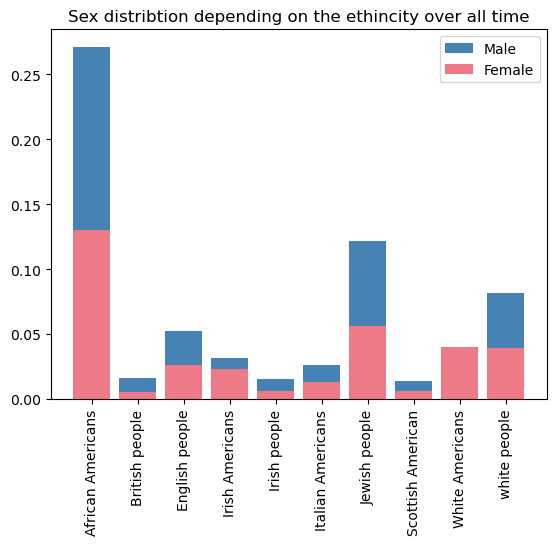

In [36]:
plt.bar(x=proportion_ethinity_M.index, height=proportion_ethinity_M.values, color="#4682b4", label="Male")
plt.bar(x=proportion_ethinity_F.index, height=proportion_ethinity_F.values, 
         color="#ee7a87", label="Female")
plt.legend()
plt.title("Sex distribtion depending on the ethincity over all time")
plt.xticks(rotation=90)

In [37]:
# Let's groupby Ethincity and Year and separate the genders.
H_ethinity_M_year = main_characters_holywood[main_characters_holywood['Gender'] == 'M'].groupby(['Ethnicity', 'Movie release year'])['Freebase actor ID'].count().sort_values()

H_ethinity_F_year = main_characters_holywood[main_characters_holywood['Gender'] == 'F'].groupby(['Ethnicity', 'Movie release year'])['Freebase actor ID'].count().sort_values()

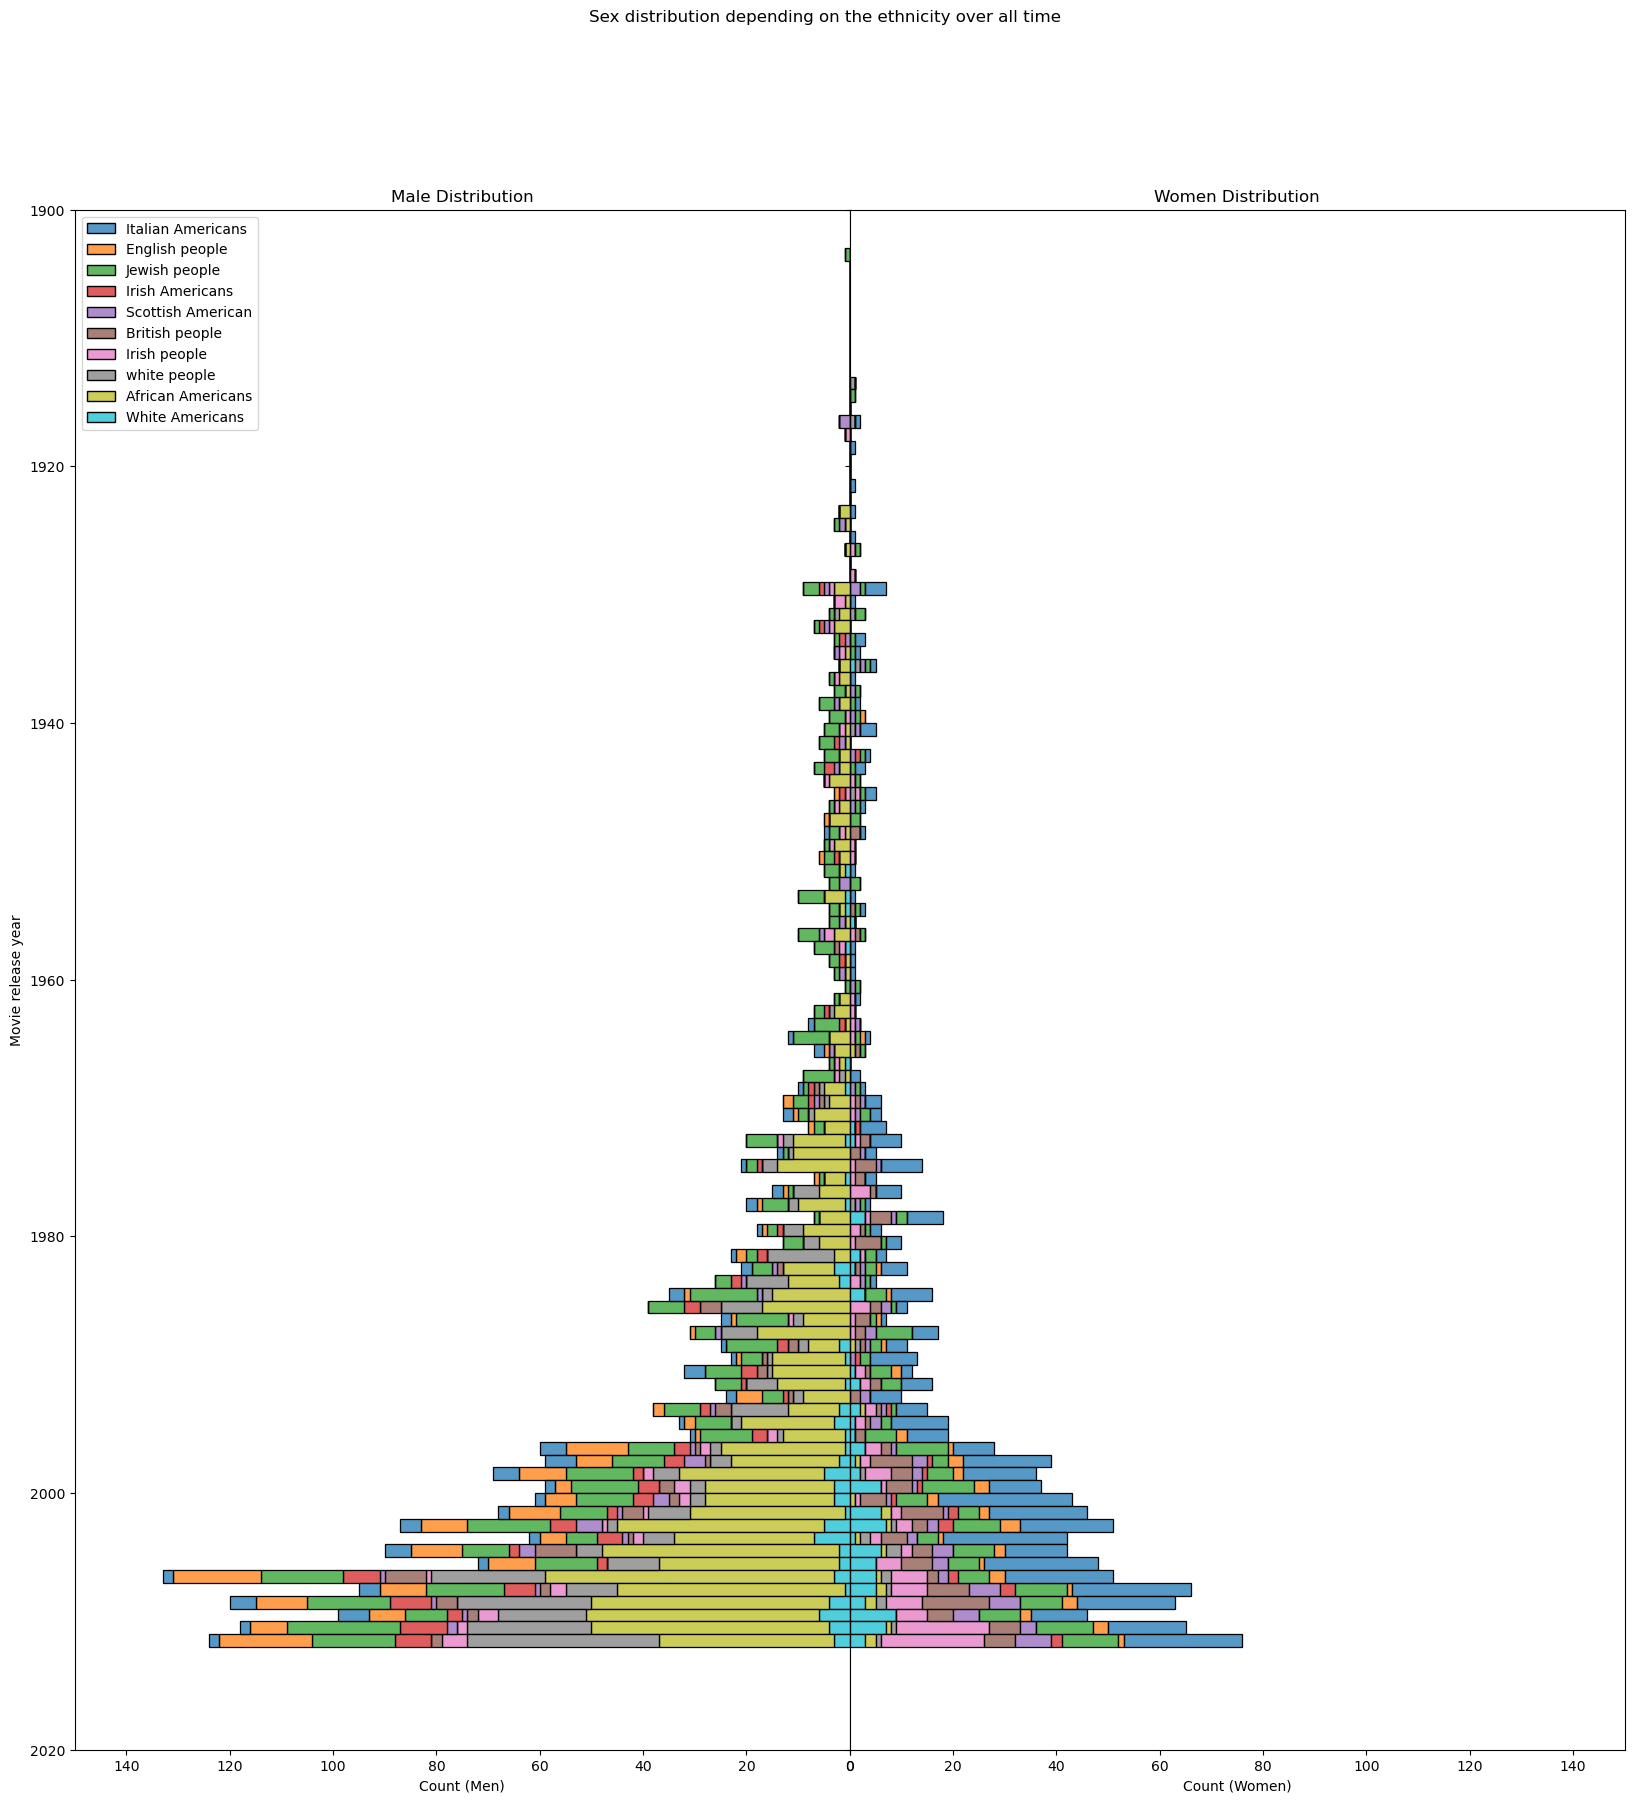

In [38]:
ethnicities_M, years_M = zip(*H_ethinity_M_year.index)
ethnicities_F, years_F = zip(*H_ethinity_F_year.index)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20, 20))
plt.subplots_adjust(wspace=0)

# Plot for men
sns.histplot(ax=ax[0], y=list(years_M), weights=np.abs(H_ethinity_M_year.values), hue=list(ethnicities_M), multiple='stack', stat='count', binwidth=1)

ax[0].set_xlabel("Count (Men)")
ax[0].invert_xaxis()# Flip the x-axis
ax[0].set_ylabel("Movie release year")
ax[0].set_ylim(2020, 1900)  # Flip the y-axis
ax[0].set_xlim(150, 0)
ax[0].set_title('Male Distribution')

# Plot for women
sns.histplot(ax=ax[1], y=list(years_F), weights=np.abs(H_ethinity_F_year.values), hue=list(ethnicities_F), multiple='stack', stat='count', binwidth=1, legend= False)
  
ax[1].set_xlabel("Count (Women)")
ax[1].set_ylim(2020, 1900)  # Flip the y-axis
ax[1].set_xlim(0, 150)
ax[1].set_title('Women Distribution')

plt.suptitle("Sex distribution depending on the ethnicity over all time")
plt.show()

Text(0.5, 0.98, '')

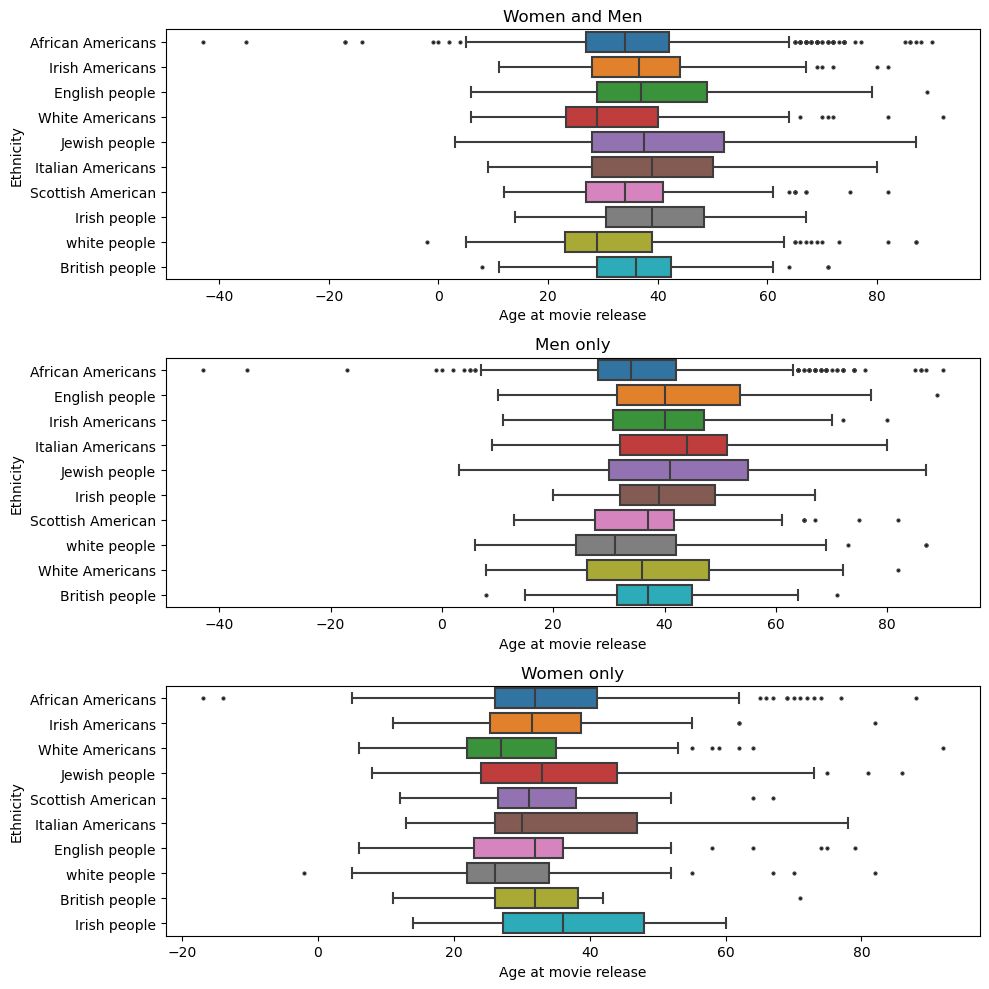

In [39]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
flierprops = dict(marker='o', markerfacecolor='black', markersize=2)

sns.boxplot(data=main_characters_holywood, x="Age at movie release", y="Ethnicity", 
            ax=ax[0], flierprops=flierprops)
ax[0].set_title('Women and Men')
ax[0].set_xlabel('Age at movie release')

sns.boxplot(data=main_characters_holywood[main_characters_holywood['Gender'] == 'M'], 
            x="Age at movie release", y="Ethnicity", ax=ax[1], flierprops=flierprops)
ax[1].set_title('Men only')
ax[1].set_xlabel('Age at movie release')

sns.boxplot(data=main_characters_holywood[main_characters_holywood['Gender'] == 'F'], 
            x="Age at movie release", y="Ethnicity", ax=ax[2], flierprops=flierprops)
ax[2].set_title('Women only')
ax[2].set_xlabel('Age at movie release')
fig.tight_layout()

plt.suptitle('', fontsize=20)

### Movie revenue depending on the ethinicity proportion

In [40]:
movie_revenues=main_characters_holywood.groupby('Movie name').apply(lambda x: pd.DataFrame({
        'Number of ethnicities': x['Ethnicity'].nunique(),
        'Revenue': x['Box office revenue'].drop_duplicates()
    }))
movie_revenues=movie_revenues.dropna()

<Axes: xlabel='Number of ethnicities', ylabel='Revenue'>

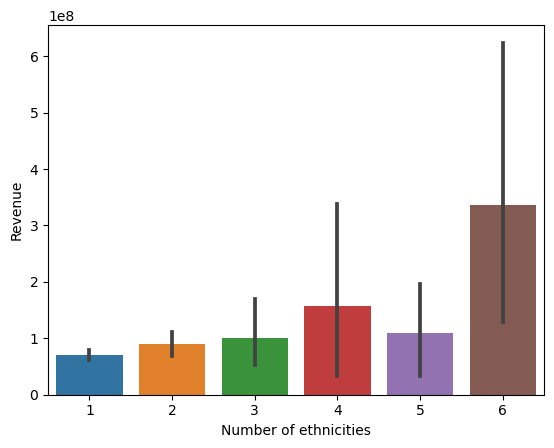

In [41]:
sns.barplot(data=movie_revenues, x='Number of ethnicities', y='Revenue')

## Role analysis

#### Unnamed actors

Text(0, 0.5, 'Percentage of unnamed actors')

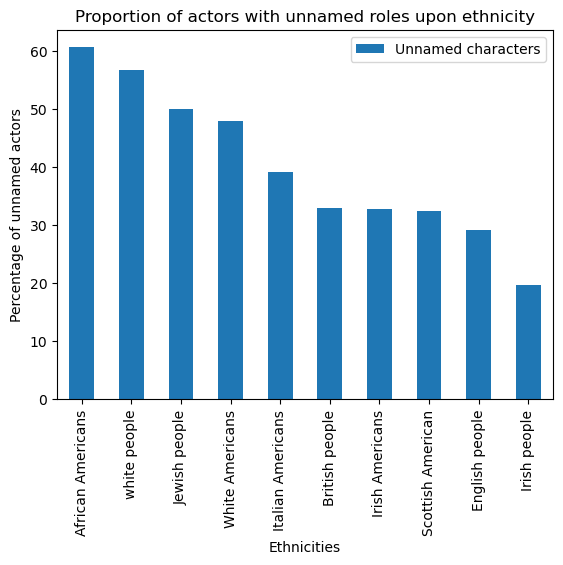

In [42]:
proportion_unnamed_actors = main_characters_holywood.copy().groupby('Ethnicity').apply(lambda x: pd.Series({
        'Unnamed characters': x['Character name'].isna().sum()*100/len(x['Character name'])
    })).sort_values(ascending=False,by = 'Unnamed characters')
proportion_unnamed_actors.plot(kind='bar')
plt.title("Proportion of actors with unnamed roles upon ethnicity")
plt.xlabel('Ethnicities')
plt.ylabel('Percentage of unnamed actors')

Now let's analyze the inside distribution of the unnamed actors 

In [43]:
unname_actors = main_characters_holywood[main_characters_holywood['Character name'].isna()]

Text(0, 0.5, 'Proportion of actors')

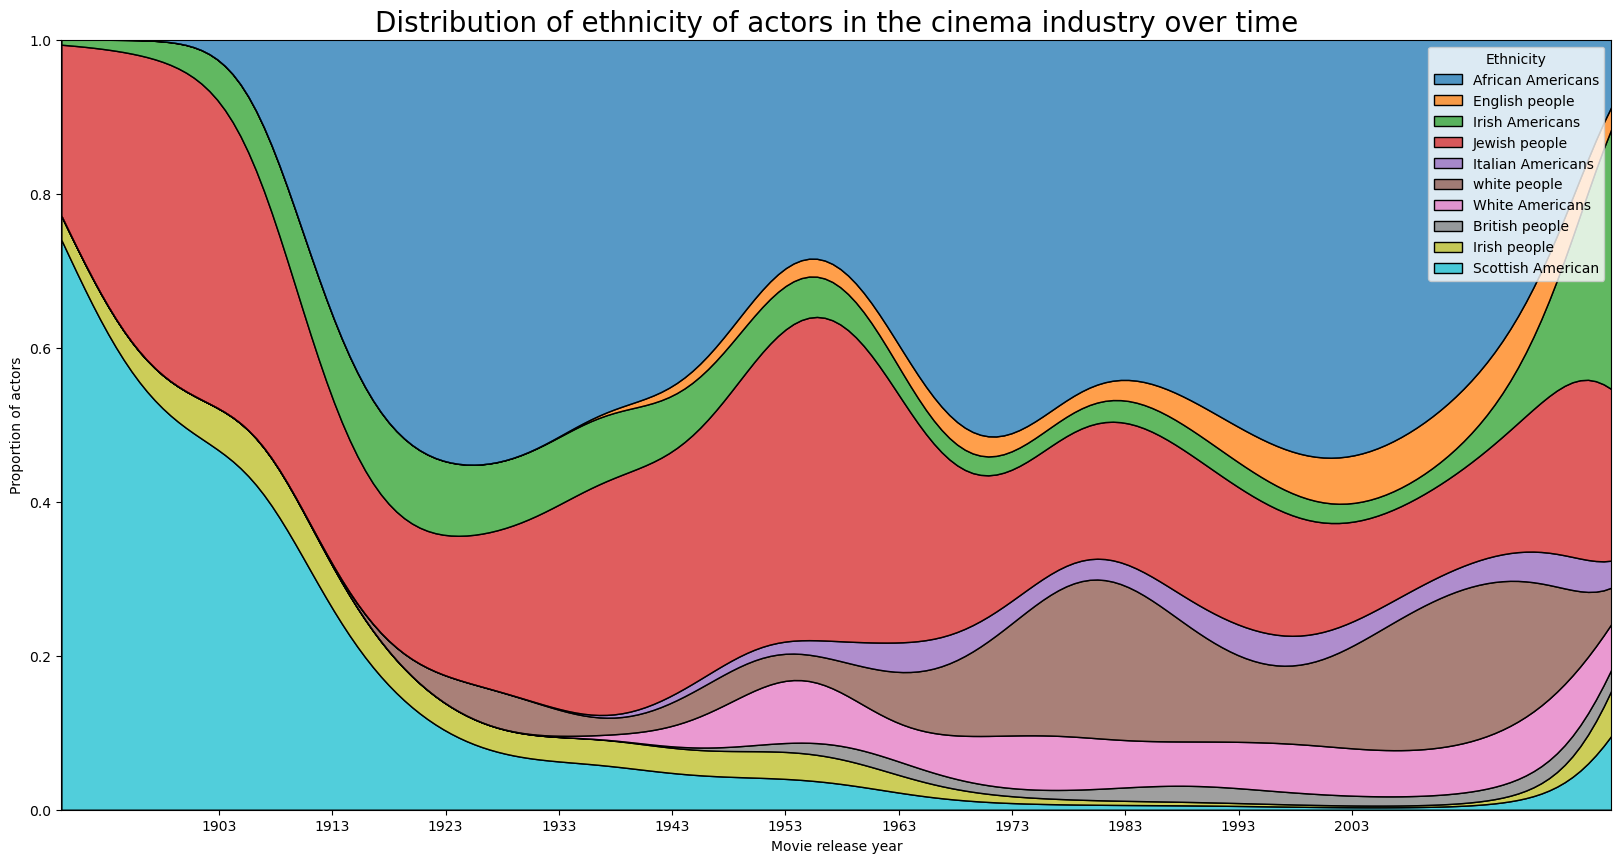

In [44]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=unname_actors,x='Movie release year',hue='Ethnicity',multiple='fill')
plt.title("Distribution of ethnicity of actors in the cinema industry over time",fontsize=20)
plt.xticks(np.arange(unname_actors['Movie release year'].min(),unname_actors['Movie release year'].max(),10))
plt.ylabel('Proportion of actors')


Text(0, 0.5, 'Number of actors')

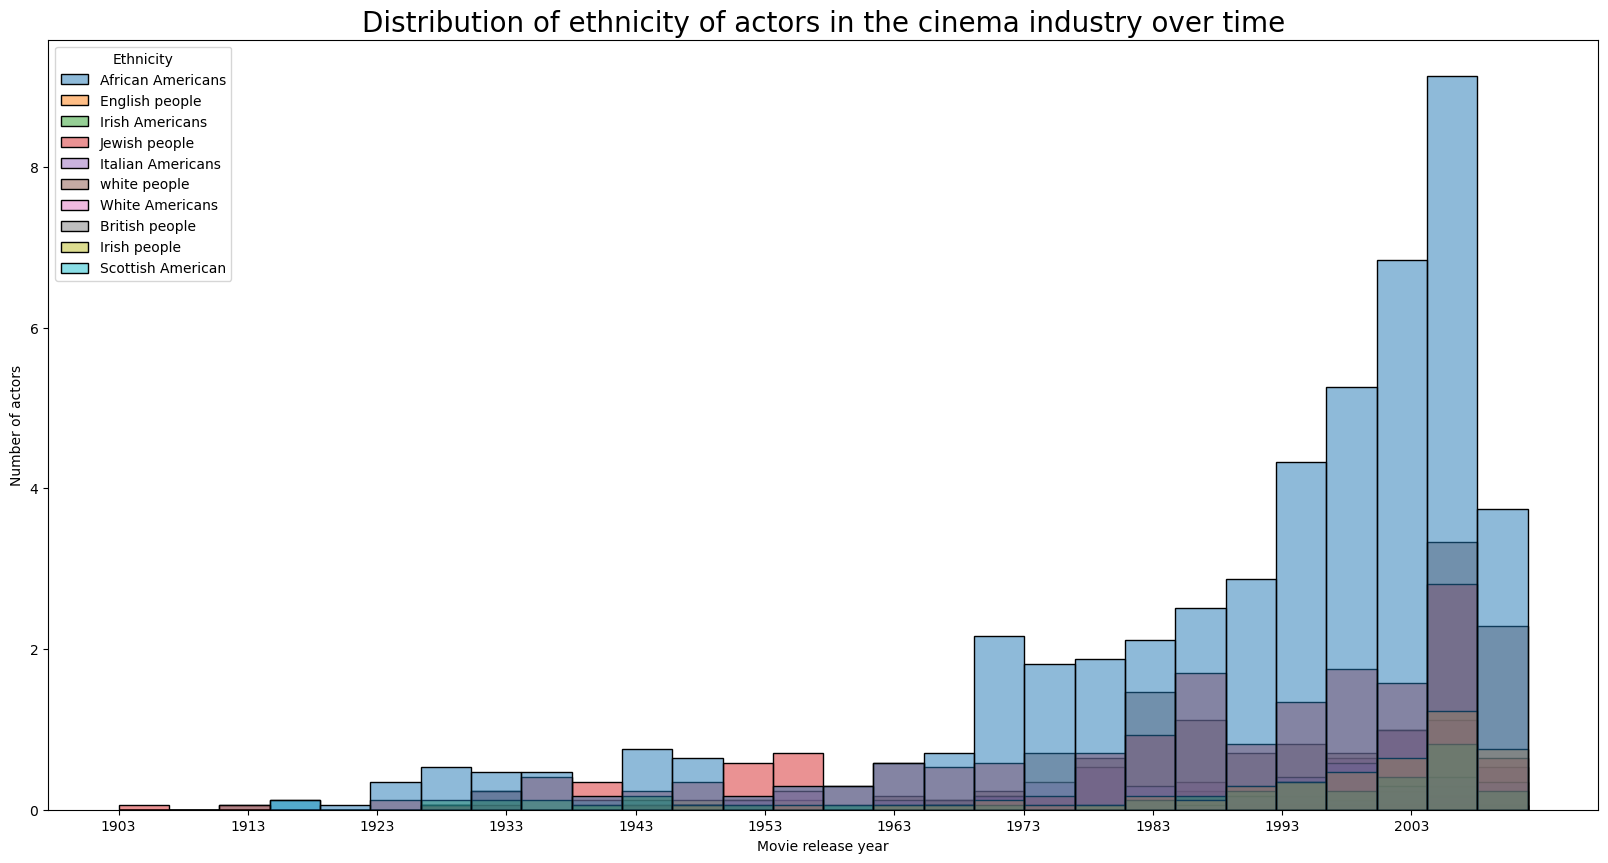

In [45]:
plt.figure(figsize=(20,10))
sns.histplot(data=unname_actors,x='Movie release year',hue='Ethnicity',stat='percent')
plt.title("Distribution of ethnicity of actors in the cinema industry over time",fontsize=20)
plt.xticks(np.arange(main_characters_holywood['Movie release year'].min(),main_characters_holywood['Movie release year'].max(),10))
plt.ylabel('Number of actors')

**Strange, I would have thought that the number of unnamed charcater would have decreased over time, as the recording method get better and better** -> Btw not really usefull as a figure

## Plot analysis

In [46]:
plot = pd.read_csv(PLOT_PATH, sep='\t',header=None,names=['Wikipedia Movie ID','Plot'])

In [48]:
plot.shape[0]

42303

In [50]:
characters_movies = characters_movies.merge(plot,on='Wikipedia Movie ID',how='left')

In [52]:
characters_movies.count()

Wikipedia Movie ID                 95606
Freebase Movie ID                  95606
Movie release date                 95606
Character name                     57088
Birth                              91644
Gender                             95559
Height                             65027
Ethnicity ID                       95606
Name                               95606
Age at movie release               86440
Freebase character/actor map ID    95606
Freebase character ID              57088
Freebase actor ID                  95606
Ethnicity                          95606
Movie name                         95606
Box office revenue                 29182
Movie runtime                      82336
Movie language                     95606
Movie countries                    95606
Movie genres                       95606
Movie release year                 95606
Plot                               72397
dtype: int64

In [47]:
main_characters_holywood = main_characters_holywood.merge(plot,on='Wikipedia Movie ID',how='left')

In [49]:
main_characters_holywood.count()

Wikipedia Movie ID                 3381
Freebase Movie ID                  3381
Movie release date                 3381
Character name                     1672
Birth                              3161
Gender                             3374
Height                             1916
Ethnicity ID                       3381
Name                               3381
Age at movie release               2961
Freebase character/actor map ID    3381
Freebase character ID              1672
Freebase actor ID                  3381
Ethnicity                          3381
Movie name                         3381
Box office revenue                 1643
Movie runtime                      3275
Movie language                     3381
Movie countries                    3381
Movie genres                       3381
Movie release year                 3381
Unique ethnicity                   3381
Plot                               2637
dtype: int64